In [1]:
# Load scenarios

%matplotlib inline

from collections import Counter, defaultdict
import glob
import gzip
import json
import math
from operator import itemgetter
import os
from pathlib import Path

from IPython.display import display, Markdown
import matplotlib
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
from pygtrie import StringTrie
import seaborn as sns

JS_CALIBRATION_RESULTS = Path("./js-benchmark-variance")
RS_SYNTHETIX_RESULTS = Path("./rs-benchmark-variance.txt")

In [2]:
js_data = defaultdict(list)

for filepath in glob.iglob(os.path.join(JS_CALIBRATION_RESULTS, "*.json")):
    total = 0
    with open(filepath) as f:
        measurements = json.load(f)
    for key, value in measurements.items():
        js_data["scenario"].append(key)
        js_data["timeMs"].append(value["timeMs"])
        total += value["timeMs"]
    js_data["scenario"].append("total")
    js_data["timeMs"].append(total)

js_df = pd.DataFrame(js_data)

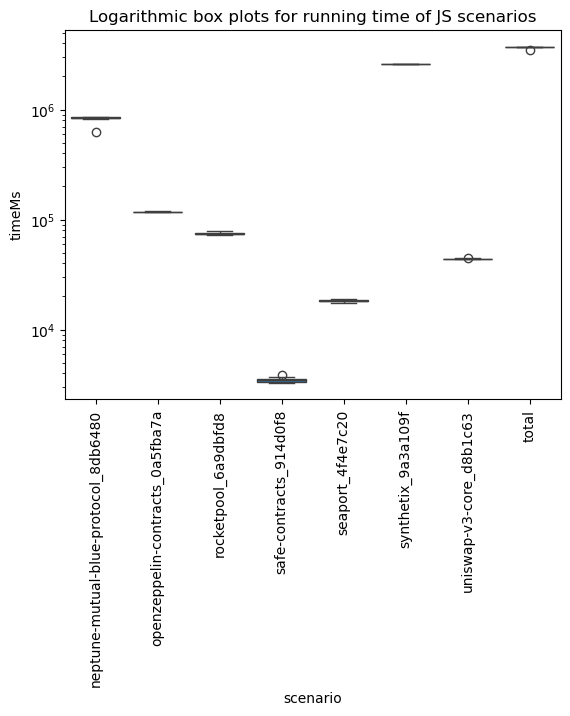

In [3]:
ax = sns.boxplot(x="scenario", y="timeMs", data=js_df)
ax.set(yscale="log")
ax.tick_params(axis='x', rotation=90)
_ = ax.set_title("Logarithmic box plots for running time of JS scenarios")

In [4]:
display(Markdown("Ratio of max/min time for each scenario in JS"))
js_df.groupby("scenario")["timeMs"].max() / js_df.groupby("scenario")["timeMs"].min()

Ratio of max/min time for each scenario in JS

scenario
neptune-mutual-blue-protocol_8db6480    1.375050
openzeppelin-contracts_0a5fba7a         1.022509
rocketpool_6a9dbfd8                     1.088690
safe-contracts_914d0f8                  1.167373
seaport_4f4e7c20                        1.071644
synthetix_9a3a109f                      1.010474
total                                   1.068472
uniswap-v3-core_d8b1c63                 1.037027
Name: timeMs, dtype: float64

In [14]:
display(Markdown("Ratio of 95% percentile over 5% percentile time for each scenario in JS"))
js_df.groupby("scenario")["timeMs"].quantile(0.95) / js_df.groupby("scenario")["timeMs"].quantile(0.05)

Ratio of 95% percentile over 5% percentile time for each scenario in JS

scenario
neptune-mutual-blue-protocol_8db6480    1.027905
openzeppelin-contracts_0a5fba7a         1.021787
rocketpool_6a9dbfd8                     1.069994
safe-contracts_914d0f8                  1.122767
seaport_4f4e7c20                        1.058928
synthetix_9a3a109f                      1.008429
total                                   1.008107
uniswap-v3-core_d8b1c63                 1.020445
Name: timeMs, dtype: float64

In [6]:
import re

rs_data = defaultdict(list)
with open(RS_SYNTHETIX_RESULTS) as f:
    for line in f.readlines():
        m = re.match("Total time: (\d+)s", line)
        if m:
            rs_data["scenario"].append("synthetix_9a3a109f")
            rs_data["timeMs"].append(int(m[1]) * 1000)
rs_df = pd.DataFrame(rs_data)
display(Markdown("Ratio of max/min time for each scenario in RS"))
rs_df.groupby("scenario")["timeMs"].max() / rs_df.groupby("scenario")["timeMs"].min()

Ratio of max/min time for each scenario in RS

scenario
synthetix_9a3a109f    1.051809
Name: timeMs, dtype: float64

In [7]:
js_snapshot_data = defaultdict(list)

for filepath in glob.iglob(os.path.join(JS_CALIBRATION_RESULTS, "*.json")):
    with open(filepath) as f:
        measurements = json.load(f)
    for key, value in measurements.items():
        js_snapshot_data["scenario"].append(key)
        js_snapshot_data["failureCount"].append(len(value["failures"]))

js_snapshot_df = pd.DataFrame(js_snapshot_data)
js_snapshot_df.groupby("scenario").describe()

failureCount                           \
                                            count          mean        std   
scenario                                                                     
neptune-mutual-blue-protocol_8db6480         23.0    556.043478  21.280547   
openzeppelin-contracts_0a5fba7a              23.0   1646.043478  26.169862   
rocketpool_6a9dbfd8                          23.0    390.000000   0.000000   
safe-contracts_914d0f8                       23.0    193.000000   0.000000   
seaport_4f4e7c20                             23.0    305.000000   0.000000   
synthetix_9a3a109f                           23.0  10264.000000   0.000000   
uniswap-v3-core_d8b1c63                      23.0    172.000000   0.000000   

                                                                          \
                                          min      25%      50%      75%   
scenario                                                                   
neptune-mutual-blue-protocol_8db6480    514.0    544.0    566.0    575.0   
openzeppelin-contracts_0a5fba7a        1615.0   1628.0   1642.0   1662.0   
rocketpool_6a9dbfd8                     390.0    390.0    390.0    390.0   
safe-contracts_914d0f8                  193.0    193.0    193.0    193.0   
seaport_4f4e7c20                        305.0    305.0    305.0    305.0   
synthetix_9a3a109f                    10264.0  10264.0  10264.0  10264.0   
uniswap-v3-core_d8b1c63                 172.0    172.0    172.0    172.0   

                                               
                                          max  
scenario                                       
neptune-mutual-blue-protocol_8db6480    575.0  
openzeppelin-contracts_0a5fba7a        1705.0  
rocketpool_6a9dbfd8                     390.0  
safe-contracts_914d0f8                  193.0  
seaport_4f4e7c20                        305.0  
synthetix_9a3a109f                    10264.0  
uniswap-v3-core_d8b1c63                 172.0

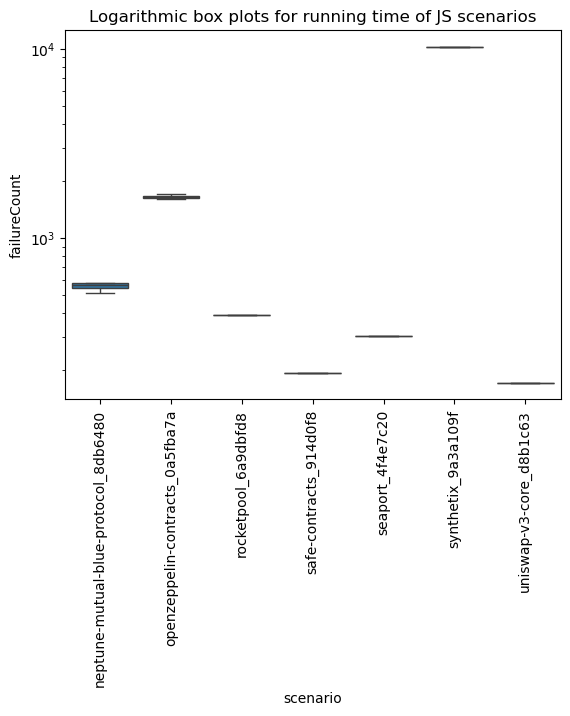

In [8]:
ax = sns.boxplot(x="scenario", y="failureCount", data=js_snapshot_df)
ax.set(yscale="log")
ax.tick_params(axis='x', rotation=90)
_ = ax.set_title("Logarithmic box plots for running time of JS scenarios")